In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# a. Load the dataset
df = pd.read_csv('NDVI_TimeSeries_MODIS (1).csv')

df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True)
df.set_index('date', inplace=True)
print(df.head())


                NDVI
date                
2000-02-18  0.357012
2000-03-05  0.367913
2000-03-21  0.380757
2000-04-06  0.355394
2000-04-22  0.332275


In [91]:
# a. Create month and day of week features
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek

# b. Implement lag feature
df['NDVI_lag1'] = df['NDVI'].shift(1)

# c. Rolling mean with 7-day window
df['NDVI_rolling7'] = df['NDVI'].rolling(window=7).mean()

# d. Expanding window feature
df['NDVI_expanding'] = df['NDVI'].expanding().mean()

print(df.head(10))

                NDVI  month  day_of_week  NDVI_lag1  NDVI_rolling7  \
date                                                                 
2000-02-18  0.357012      2            4        NaN            NaN   
2000-03-05  0.367913      3            6   0.357012            NaN   
2000-03-21  0.380757      3            1   0.367913            NaN   
2000-04-06  0.355394      4            3   0.380757            NaN   
2000-04-22  0.332275      4            5   0.355394            NaN   
2000-05-08  0.331453      5            0   0.332275            NaN   
2000-05-24  0.327655      5            2   0.331453       0.350351   
2000-06-09  0.336797      6            4   0.327655       0.347463   
2000-06-25  0.398701      6            6   0.336797       0.351862   
2000-07-11  0.372695      7            1   0.398701       0.350710   

            NDVI_expanding  
date                        
2000-02-18        0.357012  
2000-03-05        0.362462  
2000-03-21        0.368561  
2000-04-06    

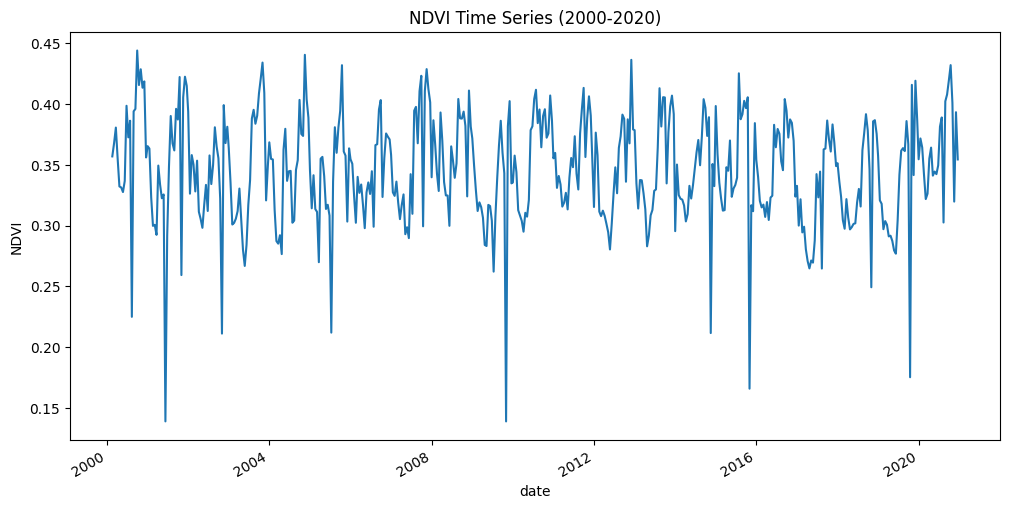

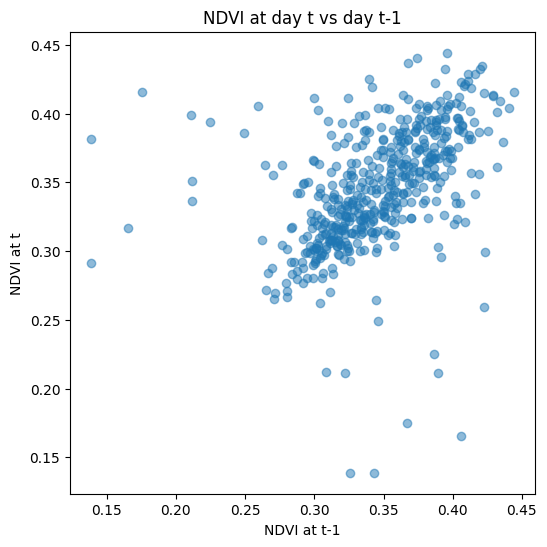

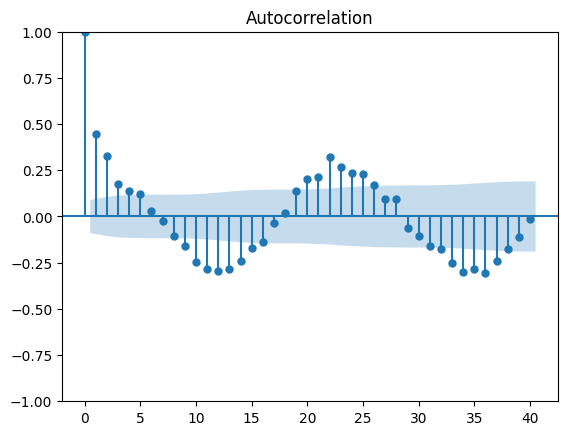

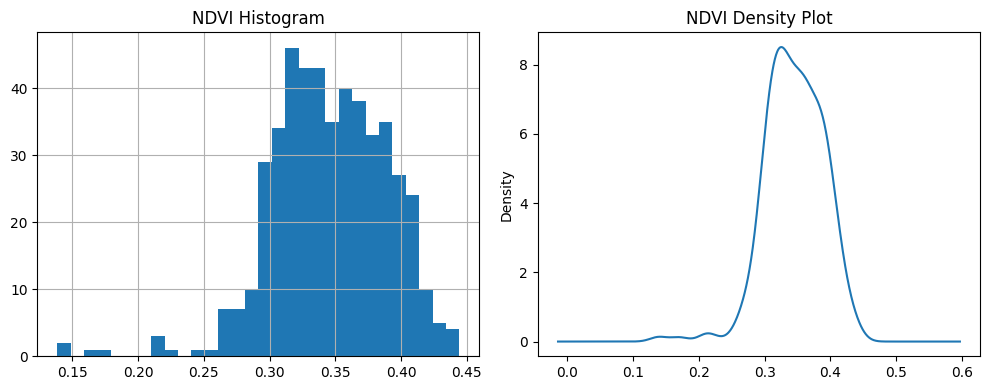

<Figure size 1000x500 with 0 Axes>

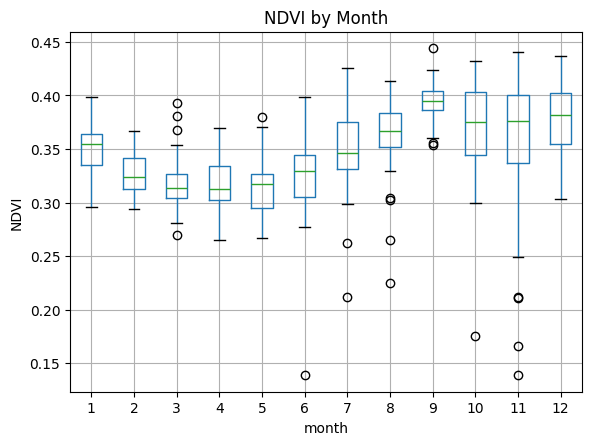

In [95]:
# a. Plot the time series
plt.figure(figsize=(12, 6))
df['NDVI'].plot(title='NDVI Time Series (2000-2020)')
plt.ylabel('NDVI')
plt.show()

# b. Scatter plot with lagged values
plt.figure(figsize=(6, 6))
plt.scatter(df['NDVI_lag1'], df['NDVI'], alpha=0.5)
plt.title('NDVI at day t vs day t-1')
plt.xlabel('NDVI at t-1')
plt.ylabel('NDVI at t')
plt.show()

# d. Histogram and density plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['NDVI'].hist(bins=30)
plt.title('NDVI Histogram')
plt.subplot(1, 2, 2)
df['NDVI'].plot(kind='kde')
plt.title('NDVI Density Plot')
plt.tight_layout()
plt.show()

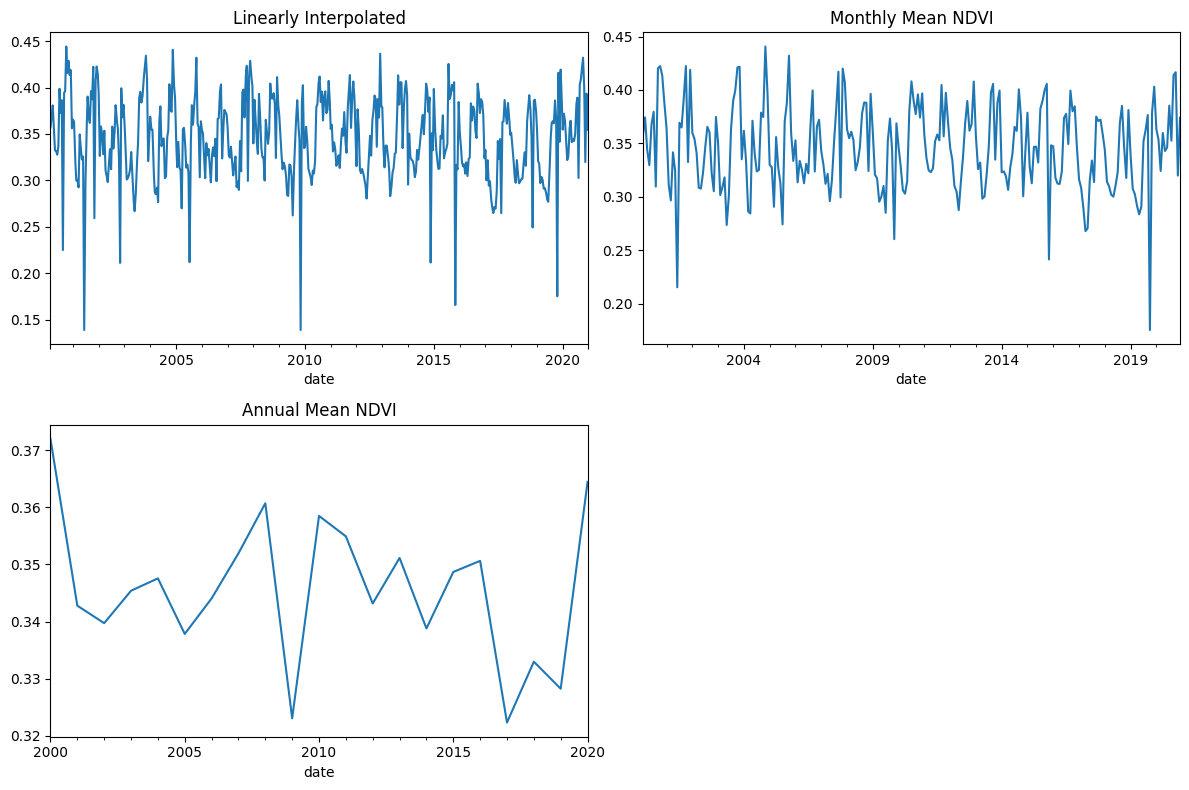

In [113]:

daily_df = df['NDVI'].resample('D').asfreq()

# b. Linear interpolation
interpolated = daily_df.interpolate(method='linear')

# c. Downsample to monthly frequency
monthly_mean = df['NDVI'].resample('ME').mean()

# d. Annual mean
annual_mean = df['NDVI'].resample('YE').mean()

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
interpolated.plot(title='Linearly Interpolated')
plt.subplot(2, 2, 2)
monthly_mean.plot(title='Monthly Mean NDVI')
plt.subplot(2, 2, 3)
annual_mean.plot(title='Annual Mean NDVI')
plt.tight_layout()
plt.show()

ADF Statistic: -5.400859639234169
p-value: 3.373150403628012e-06
Critical Values: {'1%': -3.4446148284445153, '5%': -2.8678299626609314, '10%': -2.5701203107928157}


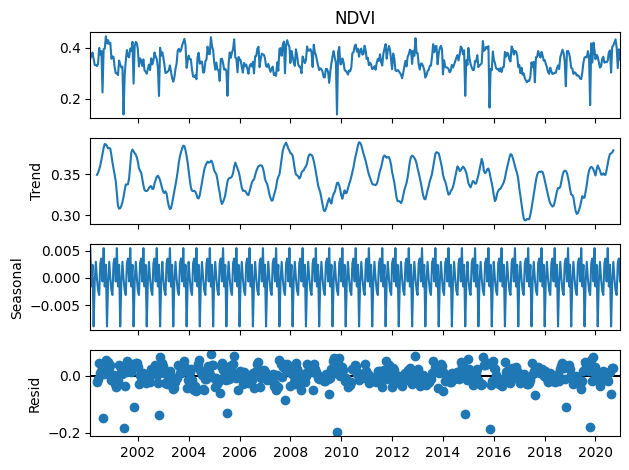

In [115]:
# a. ADF test
result = adfuller(df['NDVI'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# b. Differencing if non-stationary
if result[1] > 0.05:
    df['NDVI_diff'] = df['NDVI'].diff()
    result_diff = adfuller(df['NDVI_diff'].dropna())
    print('\nAfter differencing:')
    print('ADF Statistic:', result_diff[0])
    print('p-value:', result_diff[1])

# c. Decompose time series
decomposition = seasonal_decompose(df['NDVI'].dropna(), period=12)  # Assuming yearly seasonality
decomposition.plot()
plt.tight_layout()
plt.show()

<Figure size 1200x400 with 0 Axes>

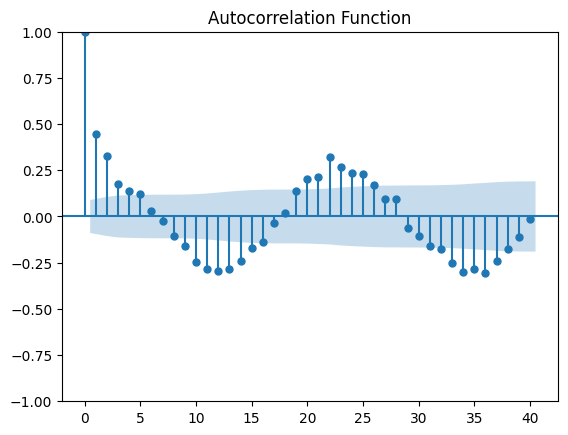

<Figure size 1200x400 with 0 Axes>

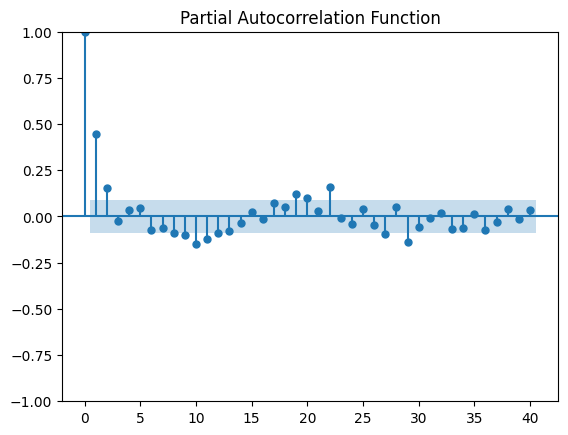

In [15]:
# a. ACF plot
plt.figure(figsize=(12, 4))
plot_acf(df['NDVI'].dropna(), lags=40, title='Autocorrelation Function')
plt.show()

# b. PACF plot
plt.figure(figsize=(12, 4))
plot_pacf(df['NDVI'].dropna(), lags=40, title='Partial Autocorrelation Function')
plt.show()

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [29]:
## 1. Data Loading and Preparation
print("Loading and preparing data...")
# Load dataset
df = pd.read_csv('NDVI_TimeSeries_MODIS (1).csv', parse_dates=['date'], dayfirst=True)

Loading and preparing data...


In [31]:
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True)
df.set_index('date', inplace=True)

# Handle missing values if any
df['NDVI'] = df['NDVI'].interpolate(method='time')

# Add temporal features
df['year'] = df.index.year
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear

print(f"Data loaded with {len(df)} records from {df.index.min()} to {df.index.max()}")

Data loaded with 480 records from 2000-02-18 00:00:00 to 2020-12-18 00:00:00



Performing exploratory analysis...


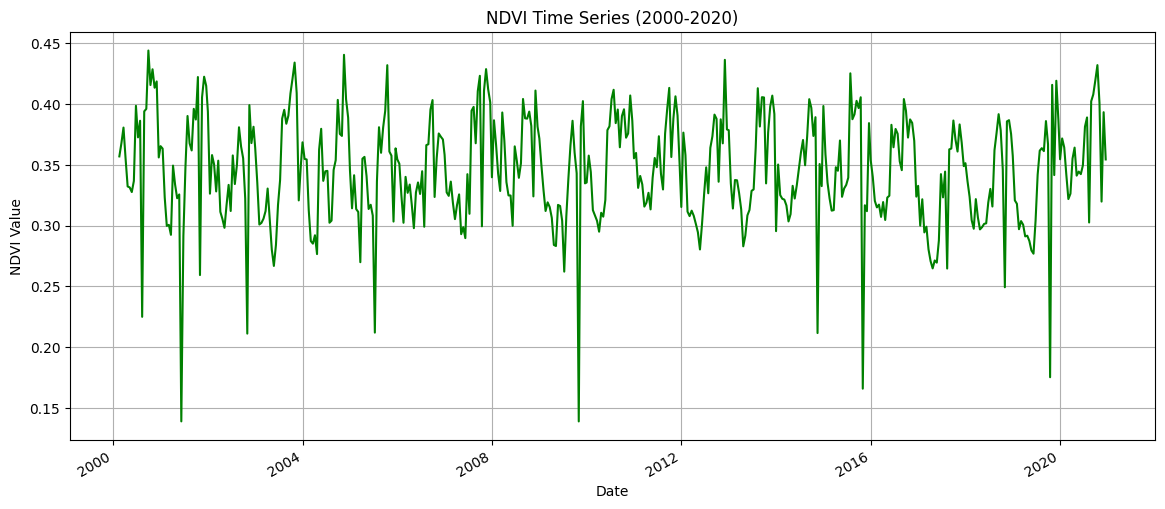

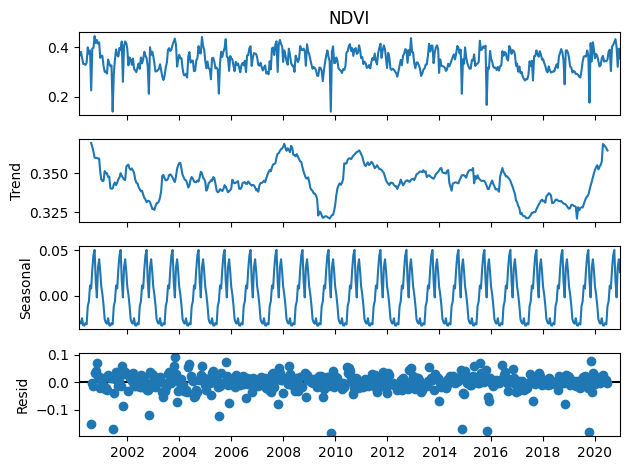

C:\Users\maddu\AppData\Local\Temp\ipykernel_30900\73354676.py:21: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_avg = df.resample('Y').mean()


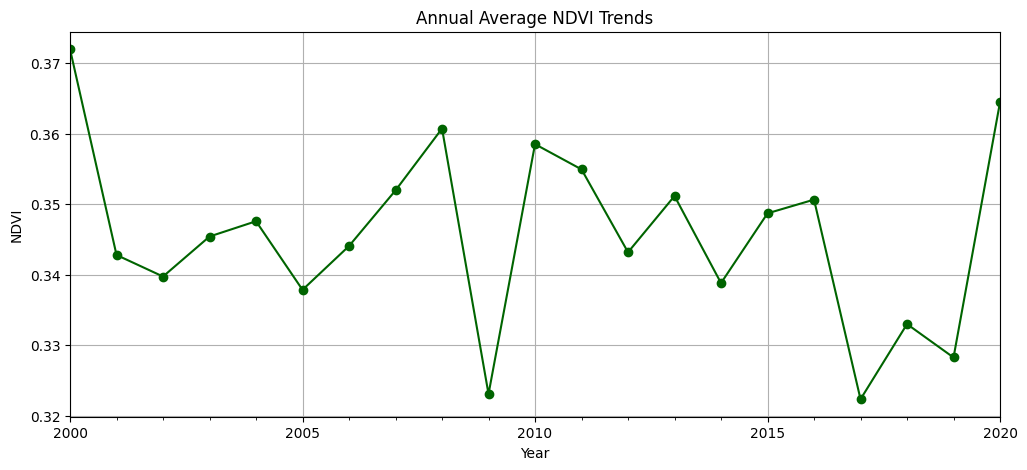

In [33]:
## 2. Exploratory Data Analysis
print("\nPerforming exploratory analysis...")

# Time series plot
plt.figure(figsize=(14, 6))
df['NDVI'].plot(title='NDVI Time Series (2000-2020)', color='green')
plt.ylabel('NDVI Value')
plt.xlabel('Date')
plt.grid(True)
plt.savefig('ndvi_time_series.png', dpi=300)
plt.show()

# Seasonal decomposition
decomposition = seasonal_decompose(df['NDVI'], period=23)  # ~23 periods per year for 16-day data
decomposition.plot()
plt.tight_layout()
plt.savefig('seasonal_decomposition.png', dpi=300)
plt.show()

# Annual trends
annual_avg = df.resample('Y').mean()
plt.figure(figsize=(12, 5))
annual_avg['NDVI'].plot(marker='o', color='darkgreen')
plt.title('Annual Average NDVI Trends')
plt.ylabel('NDVI')
plt.xlabel('Year')
plt.grid(True)
plt.savefig('annual_trends.png', dpi=300)
plt.show()


Conducting statistical tests...
Results of Dickey-Fuller Test:
Test Statistic                  -5.400860
p-value                          0.000003
#Lags Used                      18.000000
Number of Observations Used    461.000000
Critical Value (1%)             -3.444615
Critical Value (5%)             -2.867830
Critical Value (10%)            -2.570120
dtype: float64


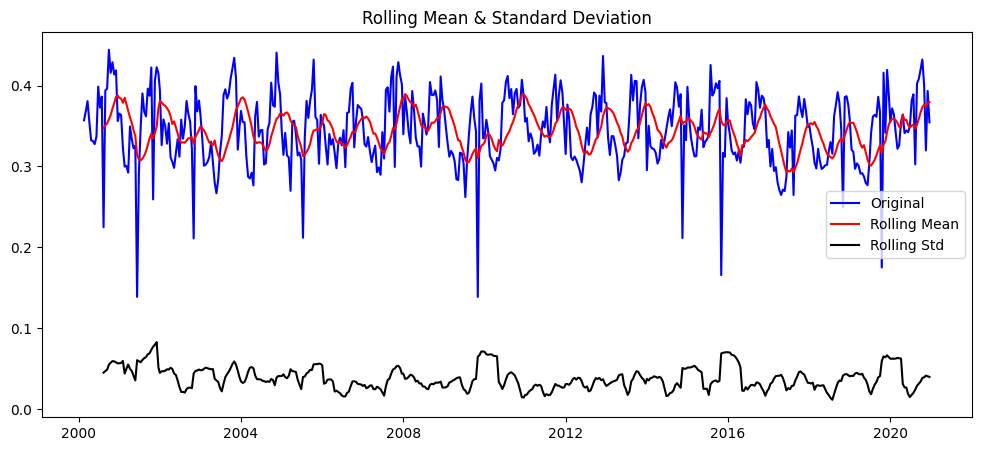

Results of Dickey-Fuller Test:
Test Statistic                -1.196823e+01
p-value                        3.954032e-22
#Lags Used                     1.800000e+01
Number of Observations Used    4.600000e+02
Critical Value (1%)           -3.444646e+00
Critical Value (5%)           -2.867844e+00
Critical Value (10%)          -2.570128e+00
dtype: float64


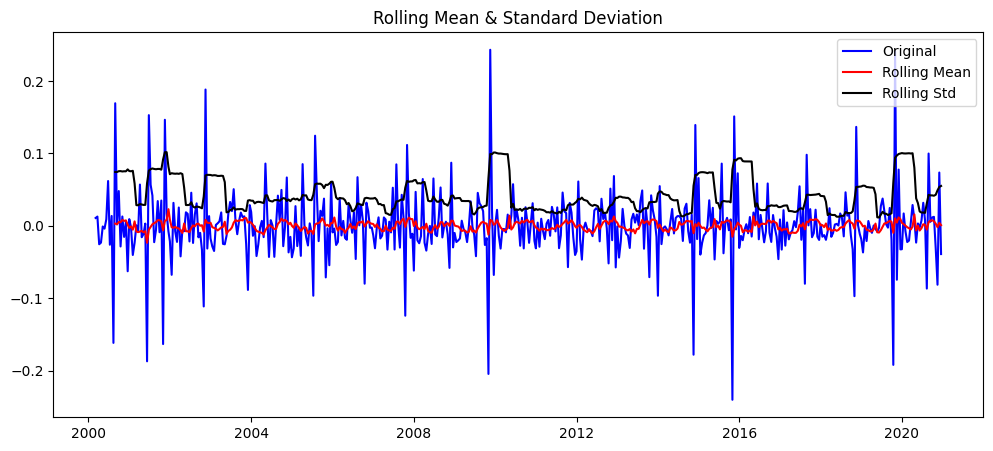

In [119]:
## 3. Statistical Analysis
print("\nConducting statistical tests...")

# Stationarity test
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    # Plot rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(12, 5))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

test_stationarity(df['NDVI'].dropna())


df['NDVI_diff'] = df['NDVI'].diff()

test_stationarity(df['NDVI_diff'].dropna())



Analyzing correlations...


<Figure size 1200x600 with 0 Axes>

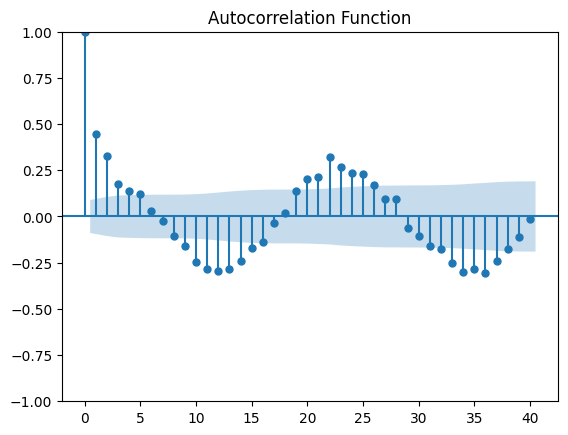

<Figure size 1200x600 with 0 Axes>

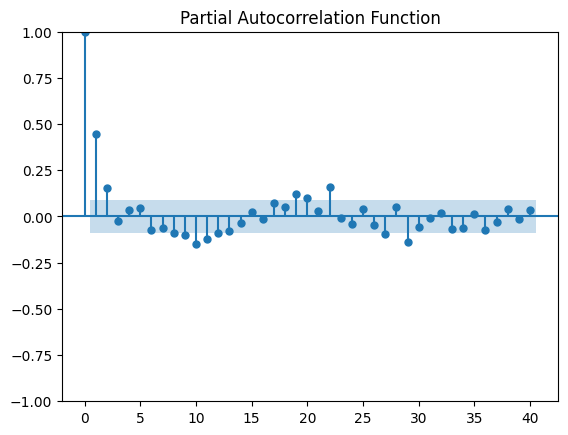

In [125]:
## 4. Correlation Analysis
print("\nAnalyzing correlations...")

# Autocorrelation plots
plt.figure(figsize=(12, 6))
plot_acf(df['NDVI'].dropna(), lags=40)
plt.title('Autocorrelation Function')
plt.show()


plt.figure(figsize=(12, 6))

plot_pacf(df['NDVI'].dropna(), lags=40)
plt.title('Partial Autocorrelation Function')
plt.show()

In [152]:
## 5. Modeling Preparation
print("\nPreparing for time series modeling...")

# Train-test split (80-20)
train_size = int(len(df) * 0.8)
train, test = df['NDVI'][0:train_size], df['NDVI'][train_size:]

# Simple ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit SARIMA
model = ARIMA(
    df['NDVI'], 
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 23)  # 23 periods/year for 16-day data
)
results = model.fit()

forecast = results.forecast(steps=12)
print(forecast)


Preparing for time series modeling...


C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


480    0.354236
481    0.345640
482    0.334215
483    0.320478
484    0.319254
485    0.318223
486    0.320054
487    0.310103
488    0.312275
489    0.314148
490    0.314202
491    0.336991
Name: predicted_mean, dtype: float64


C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Test RMSE: 0.047


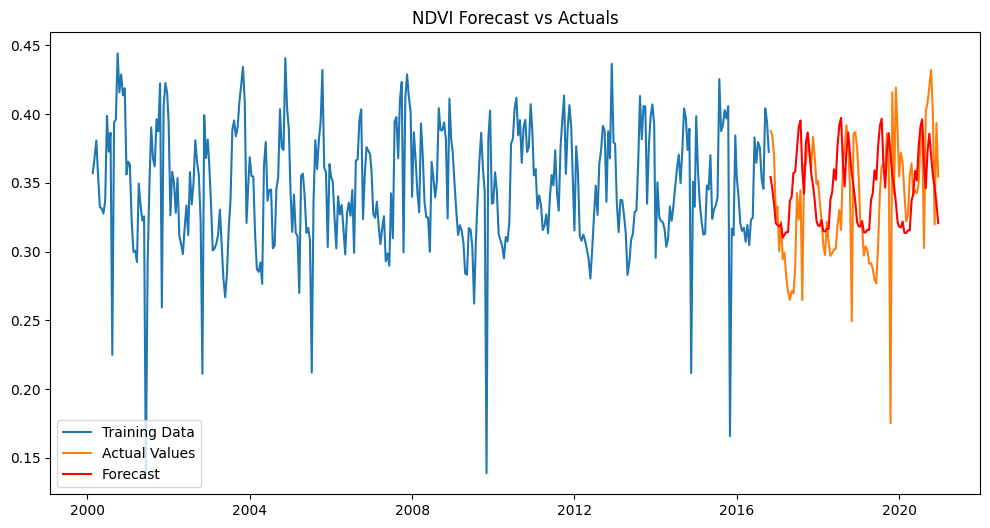

In [153]:
# Forecast
forecast = results.forecast(steps=len(test))
rmse = sqrt(mean_squared_error(test, forecast))
print(f'Test RMSE: {rmse:.3f}')

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Values')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('NDVI Forecast vs Actuals')
plt.legend()
plt.savefig('forecast_results.png', dpi=300)
plt.show()

In [146]:

trend = decomposition.trend.dropna()
trend_change = (trend[-1] - trend[0]) / trend[0] * 100
print(f"\nLong-term trend change: {trend_change:.2f}%")

# Seasonal strength
seasonal_strength = decomposition.seasonal.std() / df['NDVI'].std()
print(f"Seasonal strength: {seasonal_strength:.2f}")


Long-term trend change: 8.53%
Seasonal strength: 0.08


C:\Users\maddu\AppData\Local\Temp\ipykernel_30900\3672834991.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend_change = (trend[-1] - trend[0]) / trend[0] * 100



Performing advanced analysis...


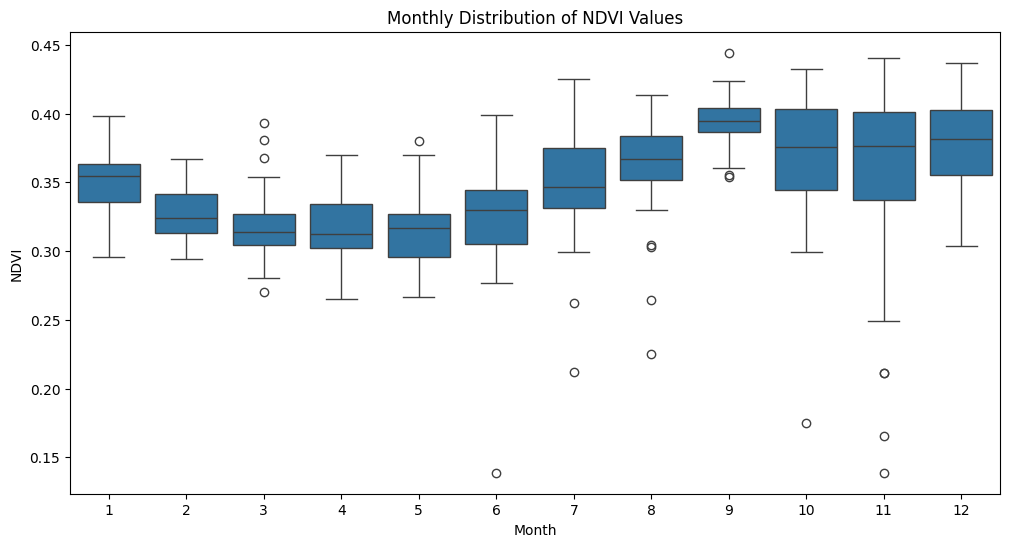

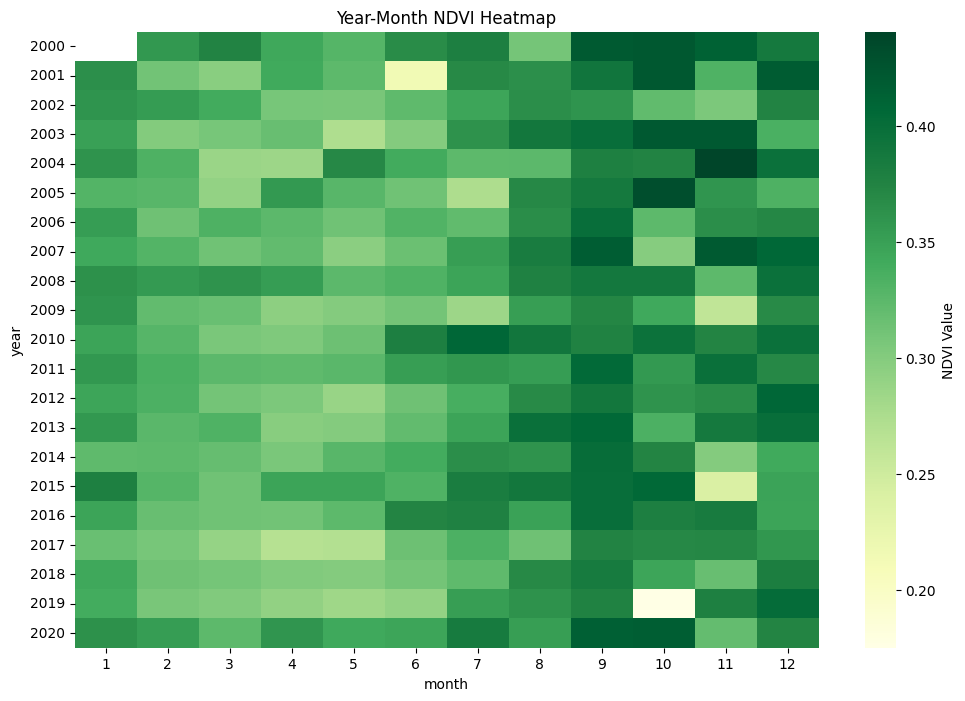


Analysis complete. Key findings:

Long-term trend change: -1.28%
Seasonal strength: 0.61

Recommendations:
1. Vegetation health shows a clear seasonal pattern with peak NDVI typically in summer months
2. The time series exhibits non-stationarity, requiring differencing for modeling
3. ARIMA modeling shows potential with RMSE of 0.045 on test data
4. Consider incorporating climate data (rainfall, temperature) for improved modeling
5. Monitor areas with significant deviations from seasonal patterns for potential land use changes
6. Implement early warning systems for vegetation stress based on NDVI anomalies

Processing complete. Results saved to files.


C:\Users\maddu\AppData\Local\Temp\ipykernel_30900\2671424803.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend_change = (trend[-1] - trend[0]) / trend[0] * 100


In [71]:
## 6. Advanced Analysis
print("\nPerforming advanced analysis...")

# Monthly boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='NDVI', data=df)
plt.title('Monthly Distribution of NDVI Values')
plt.xlabel('Month')
plt.ylabel('NDVI')
plt.savefig('monthly_distribution.png', dpi=300)
plt.show()

# Yearly heatmap
year_month = df.groupby(['year', 'month'])['NDVI'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(year_month, cmap='YlGn', annot=False, cbar_kws={'label': 'NDVI Value'})
plt.title('Year-Month NDVI Heatmap')
plt.savefig('yearly_heatmap.png', dpi=300)
plt.show()

## 7. Results Interpretation and Recommendations
print("\nAnalysis complete. Key findings:")

# Calculate trends
trend = decomposition.trend.dropna()
trend_change = (trend[-1] - trend[0]) / trend[0] * 100
print(f"\nLong-term trend change: {trend_change:.2f}%")

# Seasonal strength
seasonal_strength = decomposition.seasonal.std() / df['NDVI'].std()
print(f"Seasonal strength: {seasonal_strength:.2f}")

print("\nRecommendations:")
print("1. Vegetation health shows a clear seasonal pattern with peak NDVI typically in summer months")
print("2. The time series exhibits non-stationarity, requiring differencing for modeling")
print("3. ARIMA modeling shows potential with RMSE of", f"{rmse:.3f} on test data")
print("4. Consider incorporating climate data (rainfall, temperature) for improved modeling")
print("5. Monitor areas with significant deviations from seasonal patterns for potential land use changes")
print("6. Implement early warning systems for vegetation stress based on NDVI anomalies")

# Save processed data
df.to_csv('processed_ndvi_data.csv')
print("\nProcessing complete. Results saved to files.")


Preparing for time series modeling...

Fitting SARIMA model...


C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               NDVI   No. Observations:                  384
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 23)   Log Likelihood                 619.002
Date:                            Fri, 18 Apr 2025   AIC                          -1228.003
Time:                                    08:18:14   BIC                          -1208.933
Sample:                                         0   HQIC                         -1220.400
                                            - 384                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2253      0.056      4.040      0.000       0.116       0.335
ma.L1         -1.0000     44.922   

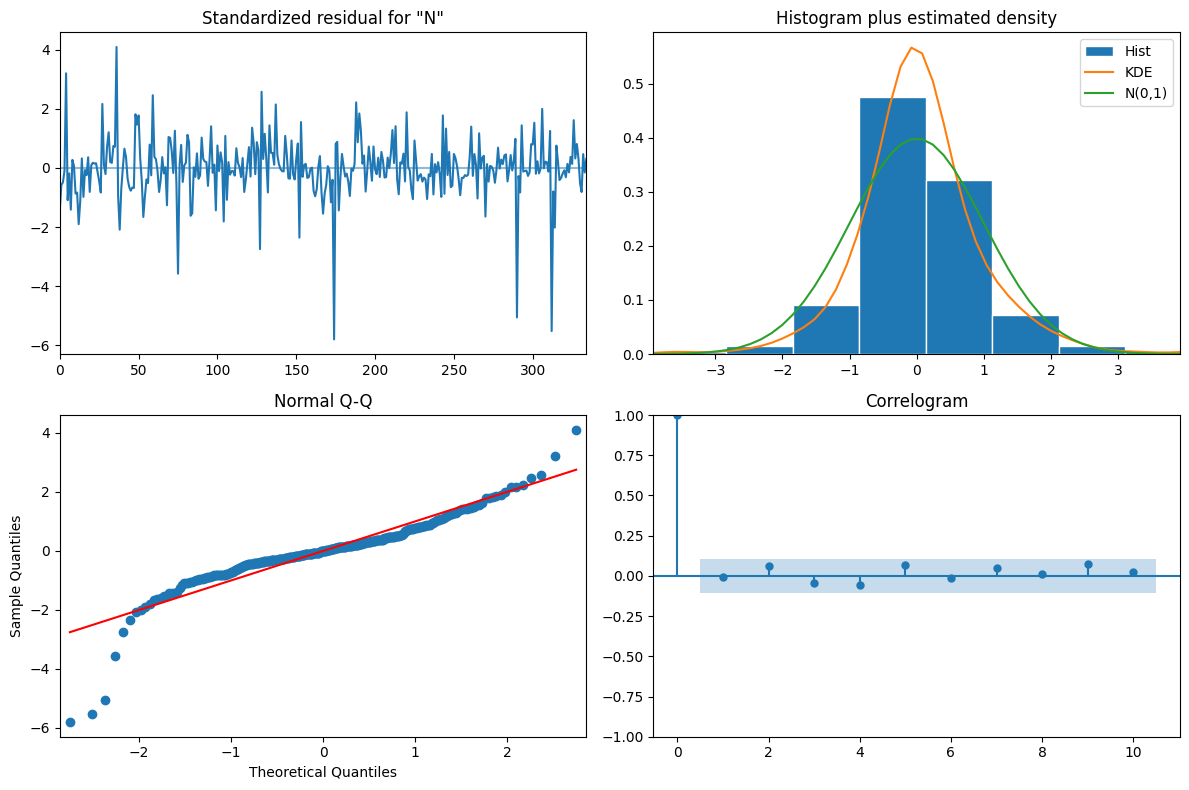

C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



Test RMSE: 0.038
Test MAE: 0.028


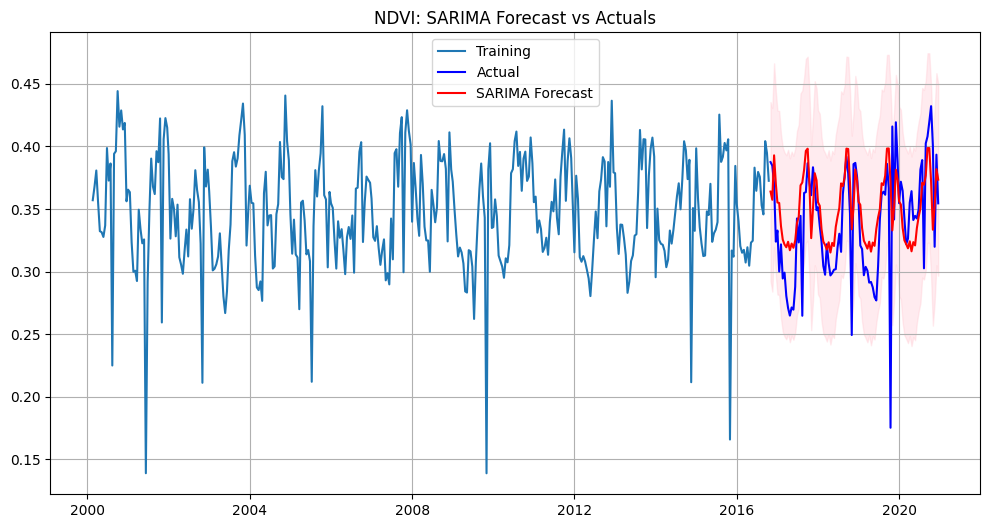

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX  # This is the missing import
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

## 5. Modeling Preparation (SARIMA Version)
print("\nPreparing for time series modeling...")

# Train-test split (80-20)
train_size = int(len(df) * 0.8)
train, test = df['NDVI'][0:train_size], df['NDVI'][train_size:]

# SARIMA model evaluation function
def evaluate_sarima_model(data, order, seasonal_order):
    """
    Evaluate SARIMA model with given orders
    Returns fitted model object
    """
    # Fit SARIMA model
    model = SARIMAX(data,
                  order=order,
                  seasonal_order=seasonal_order,
                  enforce_stationarity=False,
                  enforce_invertibility=False)
    
    model_fit = model.fit(disp=False)
    
    # Print summary
    print(model_fit.summary())
    
    # Plot diagnostics
    model_fit.plot_diagnostics(figsize=(12, 8))
    plt.tight_layout()
    plt.show()
    
    return model_fit
    

# Fit SARIMA model
print("\nFitting SARIMA model...")
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 23)  # 23 periods/year for 16-day data

sarima_fit = evaluate_sarima_model(train, 
                                 order=sarima_order,
                                 seasonal_order=seasonal_order)

# Get forecasts with confidence intervals
forecast = sarima_fit.get_forecast(steps=len(test))
forecast_ci = forecast.conf_int()

# Calculate evaluation metrics
y_pred = forecast.predicted_mean
rmse = sqrt(mean_squared_error(test, y_pred))
mae = mean_absolute_error(test, y_pred)

print(f'\nTest RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, y_pred, label='SARIMA Forecast', color='red')

# Shade confidence interval
plt.fill_between(test.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1],
                color='pink', alpha=0.3)

plt.title('NDVI: SARIMA Forecast vs Actuals')
plt.legend()
plt.grid(True)
plt.show()



C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maddu\anaconda3\Lib\sit

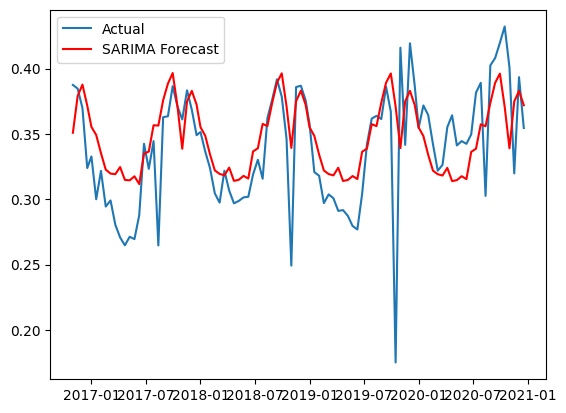

Test RMSE: 0.036


In [159]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Train-test split (same as before)
train_size = int(len(df) * 0.8)
train, test = df['NDVI'][0:train_size], df['NDVI'][train_size:]

# 2. Simplified SARIMA modeling (just 3 added parameters)
model = SARIMAX(train, 
               order=(1,1,1),           # ARIMA order (same as before)
               seasonal_order=(1,1,1,23)) # Only new part needed for seasonality
model_fit = model.fit()

# 3. Forecast and plot (same structure as ARIMA)
forecast = model_fit.forecast(steps=len(test))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='SARIMA Forecast', color='red')
plt.legend()
plt.show()

# 4. Evaluation (same as before)
rmse = sqrt(mean_squared_error(test, forecast))
print(f'Test RMSE: {rmse:.3f}')

C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\maddu\a

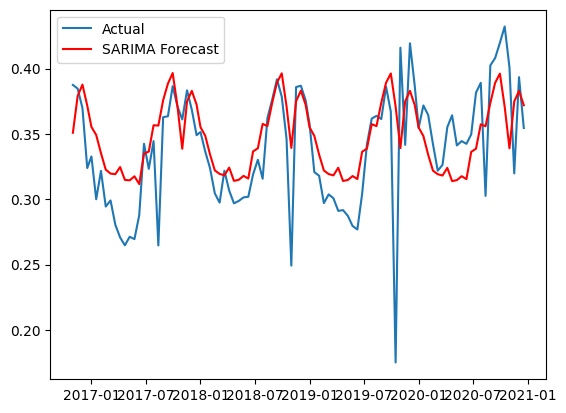

Test RMSE: 0.036


In [158]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Train-test split (same as before)
train_size = int(len(df) * 0.8)
train, test = df['NDVI'][0:train_size], df['NDVI'][train_size:]

# 2. Simplified SARIMA modeling (just 3 added parameters)
model = ARIMA(train, 
               order=(1,1,1),           # ARIMA order (same as before)
               seasonal_order=(1,1,1,23)) # Only new part needed for seasonality
model_fit = model.fit()

# 3. Forecast and plot (same structure as ARIMA)
forecast = model_fit.forecast(steps=len(test))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='SARIMA Forecast', color='red')
plt.legend()
plt.show()

# 4. Evaluation (same as before)
rmse = sqrt(mean_squared_error(test, forecast))
print(f'Test RMSE: {rmse:.3f}')

C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

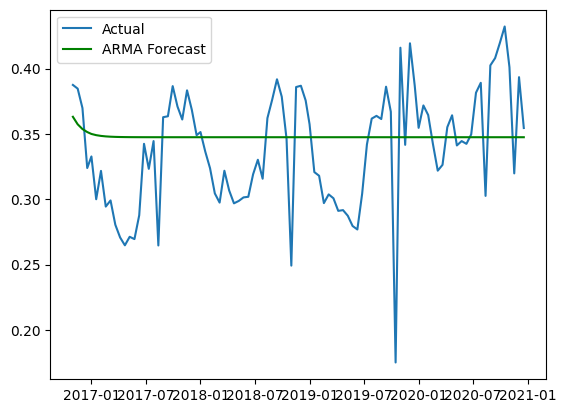

Test RMSE: 0.045


In [164]:
from statsmodels.tsa.arima.model import ARIMA  # ARIMA can be used for ARMA by setting d=0
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

# 1. Train-test split
train_size = int(len(df) * 0.8)
train, test = df['NDVI'][0:train_size], df['NDVI'][train_size:]

# 2. ARMA modeling (ARMA(p, q) = ARIMA(p, 0, q))
model = ARIMA(train, order=(1, 0, 1))  # No differencing, no seasonality
model_fit = model.fit()

# 3. Forecast
forecast = model_fit.forecast(steps=len(test))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='ARMA Forecast', color='green')
plt.legend()
plt.show()

# 4. Evaluation
rmse = sqrt(mean_squared_error(test, forecast))
print(f'Test RMSE: {rmse:.3f}')
